1/1 [==============================] - 0s 59ms/step


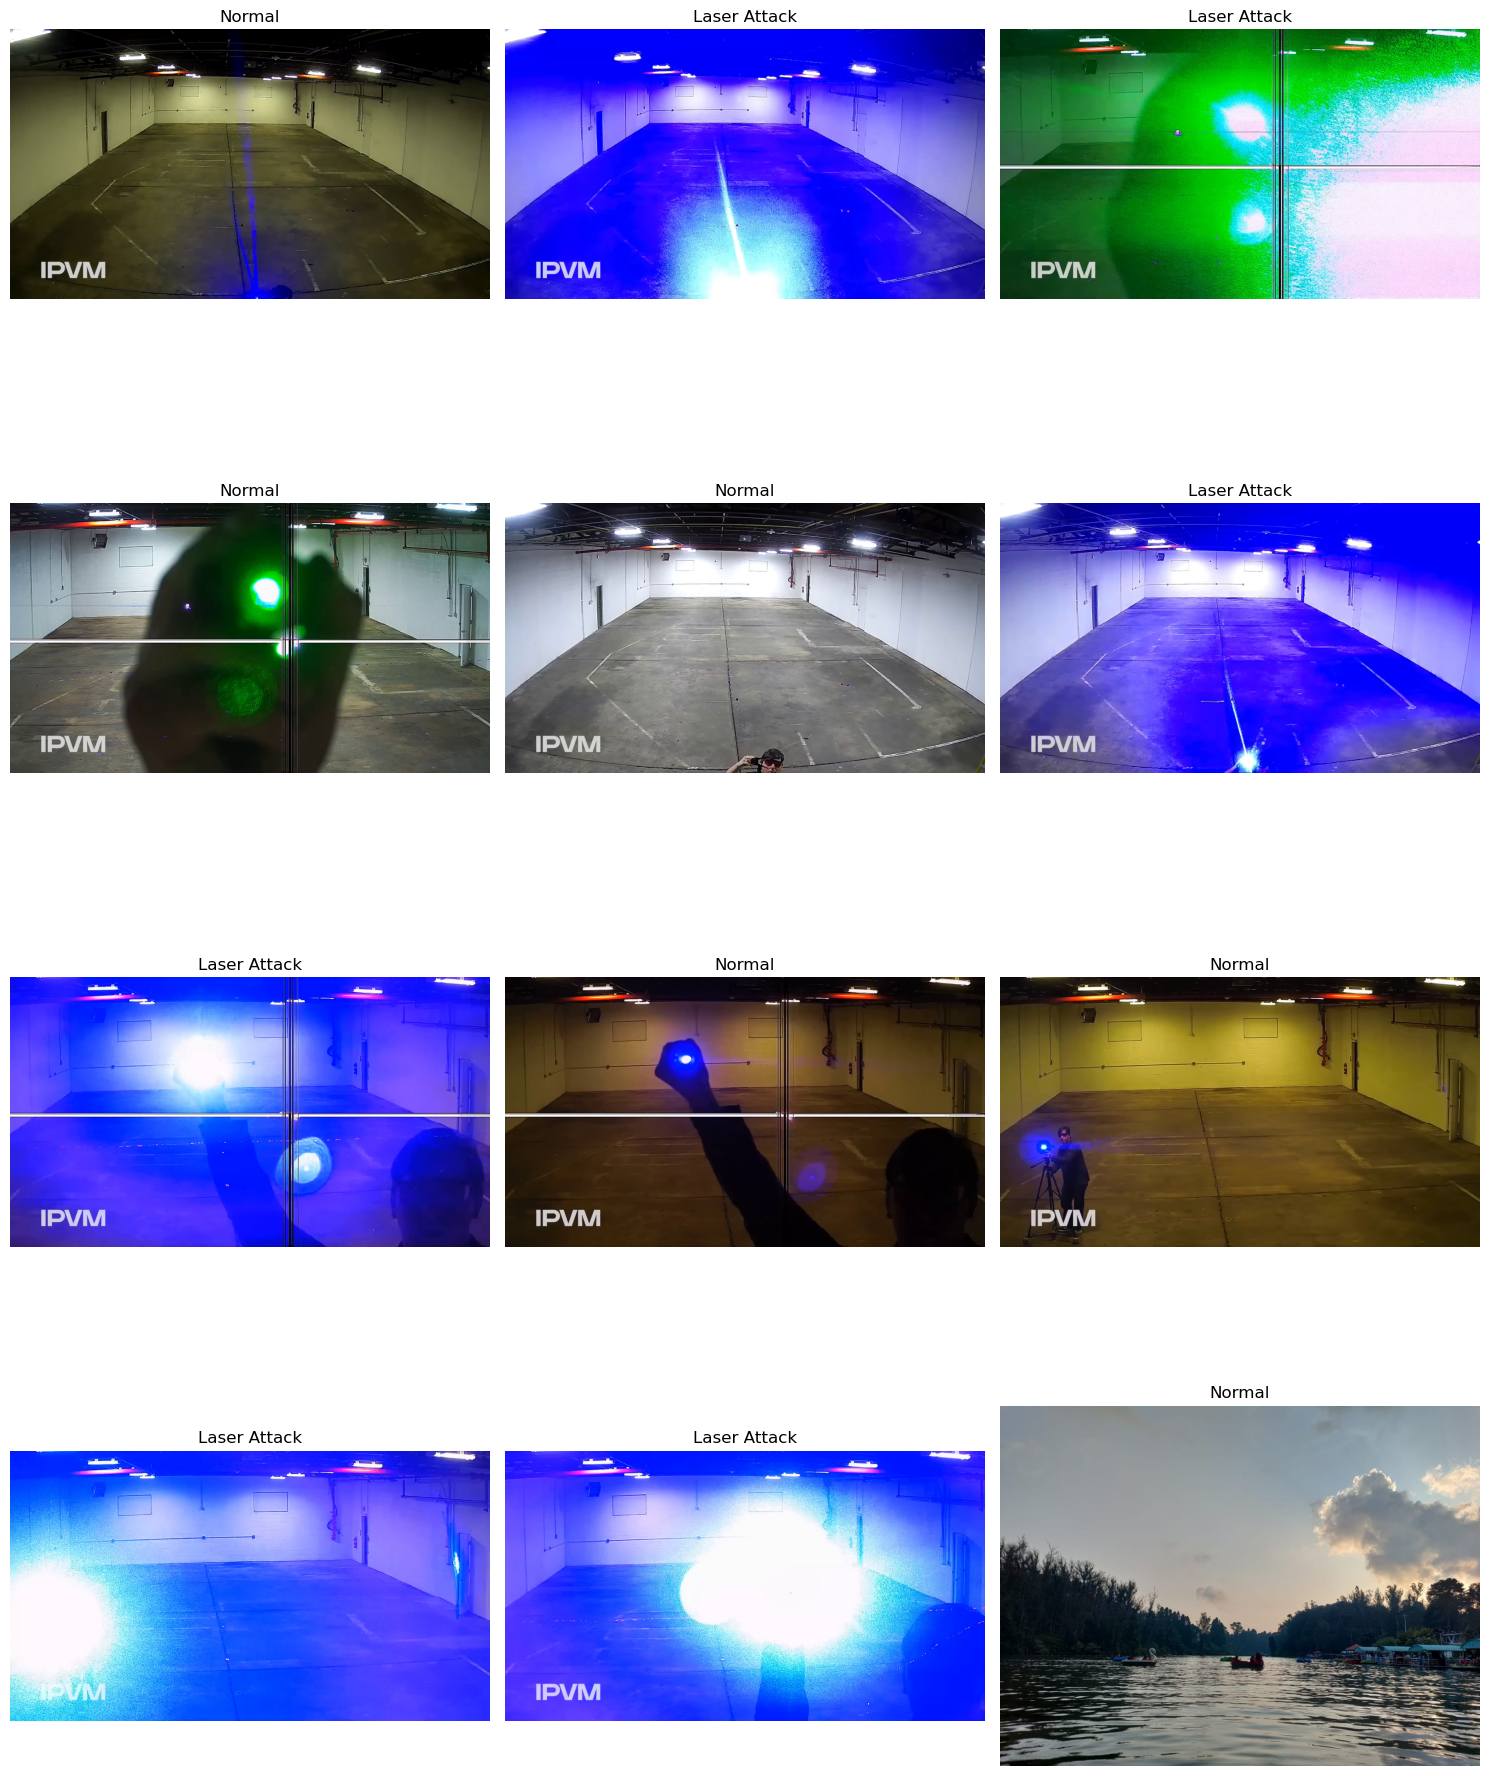

In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

test_images_path = r"S:\Projects\Volkswagen\dataset\test"
model = tf.keras.models.load_model("laser_detection_model.h5")
def preprocess_image(img_path, img_size=(128, 128)):
    img = tf.keras.utils.load_img(img_path, target_size=img_size)
    img = tf.keras.utils.img_to_array(img) / 255.0  
    return np.expand_dims(img, axis=0)  


image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
num_images = len(image_files)
columns = 3
rows = (num_images + columns - 1) // columns  
plt.figure(figsize=(15, rows * 5))  

for idx, img_file in enumerate(image_files):
    img_path = os.path.join(test_images_path, img_file)
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    label = "Laser Attack" if prediction[0] > 0.5 else "Normal"
    display_img = tf.keras.utils.load_img(img_path)
    plt.subplot(rows, columns, idx + 1)
    plt.imshow(display_img)
    plt.axis('off')
    plt.title(label)
plt.tight_layout()
plt.show()